#**EDA on Zomato Bangalore Dataset**

# **Introduction**

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

## **Finding insights**

- What kind of a food is more popular in a locality.
- Which locality of that city serves that cuisines with maximum number of restaurants • The needs of people who are striving to get the best cuisine of the neighborhood • Is a particular neighborhood famous for its own kind of food.

## **Objective**
*   Recommend top ranked resturants to customers.
*   analysis of menu items across various location and recommend less/more competitive location for the promotion of menu items.
*   Recommend the restaurants to the customer for their menu choices.
*  Find out lattitude and longitude of the location. 

## **Strategic Goal**
* Improve customer experience.
* Focused item promotions.
* Business opportunities for expansion.


**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

Importing dataset from google drive 
Dataset file type Excel(xlsx) 

In [2]:
path = "/content/drive/MyDrive/data_set/zom.xlsx"
data= pd.read_excel(path)

In [3]:
df=data #assgining orginal data set to a data frame

In [4]:
df

,Unnamed: 0,address,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost(for two people),meal_type,city,votes
0,0,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1/5,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Delivery,Koramangala 6th Block,366
1,1,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1/5,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Delivery,Old Airport Road,367
2,2,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1/5,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Dine-out,Indiranagar,360
3,3,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,Yes,No,4.1/5,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Dine-out,Old Airport Road,366
4,4,"#10061 Tower 10, Prestige Shanti Niketan., Whi...",Cupcake Couture,No,No,3.8/5,Whitefield,Delivery,"Cup Cake, Chocolate Truffle",Desserts,300,Delivery,Whitefield,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19228,19228,"Zone By The Park, 26/A, Electronic City, Banga...",Z-Bar,No,Yes,4.1/5,Electronic City,Bar,"Cocktails, Tandoori Chicken, Wine, Ice Tea, Fr...","Finger Food, North Indian",1500,Pubs and bars,Electronic City,410
19229,19229,"Zone by The Park, 26/A, Phase 1, Electronic Ci...",Bazaar - Zone By The Park,No,Yes,4.0/5,Electronic City,Casual Dining,"Salads, Chicken Tikka, Roti, Gulab Jamun, Lunc...","Continental, South Indian, North Indian, Asian",1400,Buffet,Electronic City,415
19230,19230,"Zone by The Park, 26/A, Phase 1, Electronic Ci...",Bazaar - Zone By The Park,No,Yes,4.0/5,Electronic City,Casual Dining,"Salads, Chicken Tikka, Roti, Gulab Jamun, Lunc...","Continental, South Indian, North Indian, Asian",1400,Dine-out,Electronic City,415
19231,19231,"c/o Foodism, 2nd A Main Road, 445/31, 7th Cros...",Artinci Artisanal Ice Cream,Yes,No,4.2/5,Marathahalli,Dessert Parlor,"Coffee, Vanilla Ice Cream, Almond Ice Cream","Desserts, Ice Cream",300,Delivery,Marathahalli,44


#**Columns description**


* **address** contains the address of the restaurant in Bengaluru

* **name** contains the name of the restaurant

* **online_order** whether online ordering is available in the restaurant or not

* **book_table** table book option available or not

* **rate** contains the overall rating of the restaurant out of 5

* **votes** contains total number of rating for the restaurant as of the above mentioned date

* **location** contains the neighborhood in which the restaurant is located

* **rest_type** restaurant type

* **dish_liked** dishes people liked in the restaurant

* **cuisines** food styles, separated by comma

* **approx_cost(for two people)** contains the approximate cost for meal for two people


## **Data cleaning**

**Before Cleaning**

In [5]:
df.shape

(19233, 14)

In [6]:
df.dtypes

Unnamed: 0                      int64
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)     int64
meal_type                      object
city                           object
votes                           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233 entries, 0 to 19232
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   19233 non-null  int64 
 1   address                      19233 non-null  object
 2   name                         19233 non-null  object
 3   online_order                 19233 non-null  object
 4   book_table                   19233 non-null  object
 5   rate                         19233 non-null  object
 6   location                     19233 non-null  object
 7   rest_type                    19233 non-null  object
 8   dish_liked                   19233 non-null  object
 9   cuisines                     19233 non-null  object
 10  approx_cost(for two people)  19233 non-null  int64 
 11  meal_type                    19233 non-null  object
 12  city                         19233 non-null  object
 13  votes                        19

There is no null values in columns before cleaning.

In [8]:
df.describe()

,Unnamed: 0,approx_cost(for two people),votes
count,19233.000000,19233.000000,19233.000000
mean,9616.000000,708.809858,420.982582
std,5552.233199,503.524302,699.775971
min,0.000000,40.000000,0.000000
25%,4808.000000,400.000000,94.000000
50%,9616.000000,600.000000,199.000000
75%,14424.000000,800.000000,462.000000
max,19232.000000,6000.000000,16345.000000


In [9]:
df.describe(include=['object', 'bool'])

,address,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,meal_type,city
count,19233,19233,19233,19233,19233,19233,19233,19233,19233,19233,19233
unique,4175,3023,2,2,31,87,73,4809,1602,7,30
top,"The Ritz-Carlton, 99, Residency Road, Bangalore",KFC,Yes,No,3.9/5,BTM,Casual Dining,Biryani,North Indian,Delivery,BTM
freq,45,57,13976,14967,3012,1334,6221,168,964,9184,1225


In [10]:
df.isna().sum()

Unnamed: 0                     0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
meal_type                      0
city                           0
votes                          0
dtype: int64

In [11]:
df.rate=df.rate.replace({'/5':''},regex=True) #
df=df[df['rate']!='NEW'] #
df['rate'] = df['rate'].astype(float) #
df['online_order']=df['online_order'].apply(lambda x: '1' if str(x)=='Yes' else '0') #
df['book_table']=df['book_table'].apply(lambda x: '1' if str(x)=='Yes' else '0') #

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df.drop_duplicates(inplace=True,keep='first')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df=df.rename(columns={'approx_cost(for two people)':'cost'})

In [15]:
df.head(5)

,Unnamed: 0,address,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,cost,meal_type,city,votes
0,0,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,1,0,4.1,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Delivery,Koramangala 6th Block,366
1,1,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,1,0,4.1,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Delivery,Old Airport Road,367
2,2,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,1,0,4.1,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Dine-out,Indiranagar,360
3,3,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,1,0,4.1,Domlur,Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Dine-out,Old Airport Road,366
4,4,"#10061 Tower 10, Prestige Shanti Niketan., Whi...",Cupcake Couture,0,0,3.8,Whitefield,Delivery,"Cup Cake, Chocolate Truffle",Desserts,300,Delivery,Whitefield,40


**After Cleaning**

In [16]:
df.describe()

,Unnamed: 0,rate,cost,votes
count,19098.000000,19098.000000,19098.000000,19098.000000
mean,9639.692429,3.868923,706.976647,423.958425
std,5553.350873,0.399374,503.618442,701.346126
min,0.000000,2.000000,40.000000,0.000000
25%,4840.250000,3.700000,400.000000,95.000000
50%,9650.500000,3.900000,600.000000,201.000000
75%,14452.750000,4.100000,800.000000,465.000000
max,19232.000000,4.900000,6000.000000,16345.000000


In [17]:
df.describe(include=['object', 'bool'])

,address,name,online_order,book_table,location,rest_type,dish_liked,cuisines,meal_type,city
count,19098,19098,19098,19098,19098,19098,19098,19098,19098,19098
unique,4150,3002,2,2,87,73,4768,1589,7,30
top,"The Ritz-Carlton, 99, Residency Road, Bangalore",KFC,1,0,BTM,Casual Dining,Biryani,North Indian,Delivery,BTM
freq,45,57,13916,14904,1324,6170,166,957,9135,1210


In [18]:
df.dtypes

Unnamed: 0        int64
address          object
name             object
online_order     object
book_table       object
rate            float64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost              int64
meal_type        object
city             object
votes             int64
dtype: object

In [19]:
df.shape

(19098, 14)

After cleaning the Dataset 19233 columns reduced to 19098.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19098 entries, 0 to 19232
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    19098 non-null  int64  
 1   address       19098 non-null  object 
 2   name          19098 non-null  object 
 3   online_order  19098 non-null  object 
 4   book_table    19098 non-null  object 
 5   rate          19098 non-null  float64
 6   location      19098 non-null  object 
 7   rest_type     19098 non-null  object 
 8   dish_liked    19098 non-null  object 
 9   cuisines      19098 non-null  object 
 10  cost          19098 non-null  int64  
 11  meal_type     19098 non-null  object 
 12  city          19098 non-null  object 
 13  votes         19098 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.2+ MB


There is no Null values after data cleaning.

# **Exploratory Data Analysis**


## Analyzing the Food Culture of Bangalore



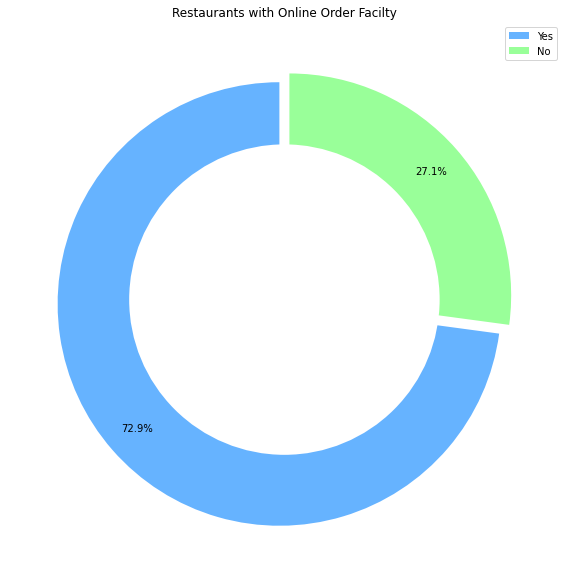

In [21]:
labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.03,0.03)

plt.figure(figsize=(10,8))
plt.pie(df['online_order'].value_counts(),colors = colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.legend(labels)
plt.title("Restaurants with Online Order Facilty")
plt.show()

**Insights** 

*   Most of Resturants in Bangalore People takes Online order with 72.9% 
* Restaurants which are not providing online order 27.1% 



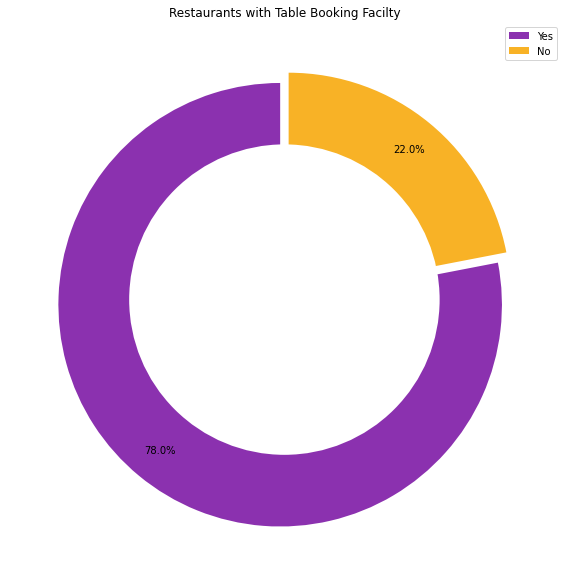

In [22]:
labels = ['Yes','No']
colors = ['#8B31AF','#F8B226']
explode = (0.03,0.03)

plt.figure(figsize=(10,8))
plt.pie(df['book_table'].value_counts(),colors = colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.legend(labels)
plt.title("Restaurants with Table Booking Facilty")
plt.show()

**Insights**
* Most of Resturants in Bangalore provides books the table  order with 78%
* Resturants which are not provides Table booking facility with 22%

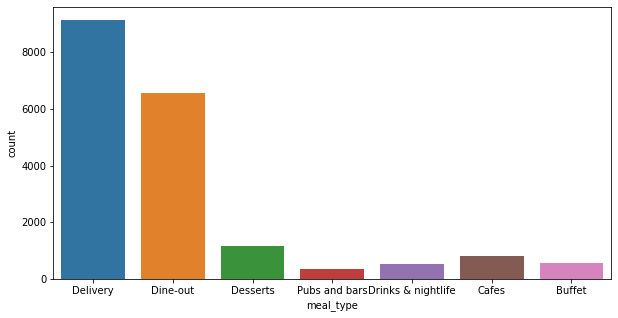

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="meal_type", data=df)


**Insights**


*   The majority of restaurants offer delivery, which might account for the above conclude that people at Bangalore prefer to eat at home.
*   Pubs and Bars,Buffet.cafes are offered by very less number of restaurants.
* Most of people in Bangalore prefers Delivery and Dine out

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurant types')

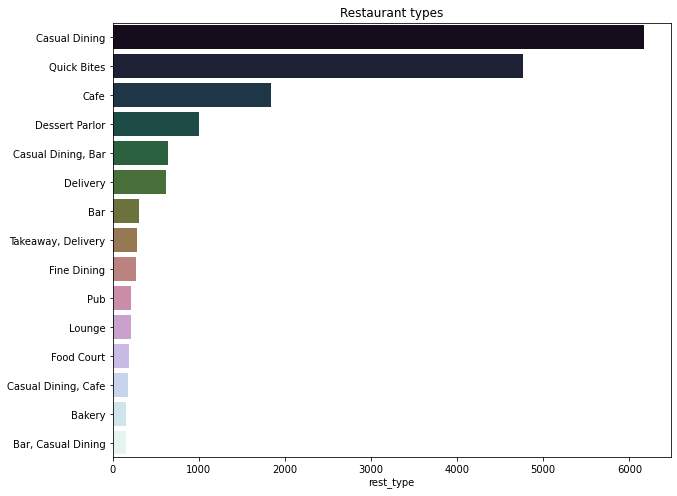

In [24]:
plt.figure(figsize=(10,8))
x=df['rest_type'].value_counts()[0:15]
sns.barplot(x,x.index,palette="cubehelix")
plt.title("Restaurant types")

**Insights**

*  We see that, the most number of restaurants are of the type casual dining.
*   From the above plot it is clear that people at Bangalore prefer 'quick bites' more often.
*This supports our above conclusion, which was drawn from the count plot of book table feature that citizens of Bangalore prefer fast food-quick bites more often this is why many restaurants does not offer table booking facility



## Which are the top restaurant chains in Bangalore ?

Text(0, 0.5, 'Chains')

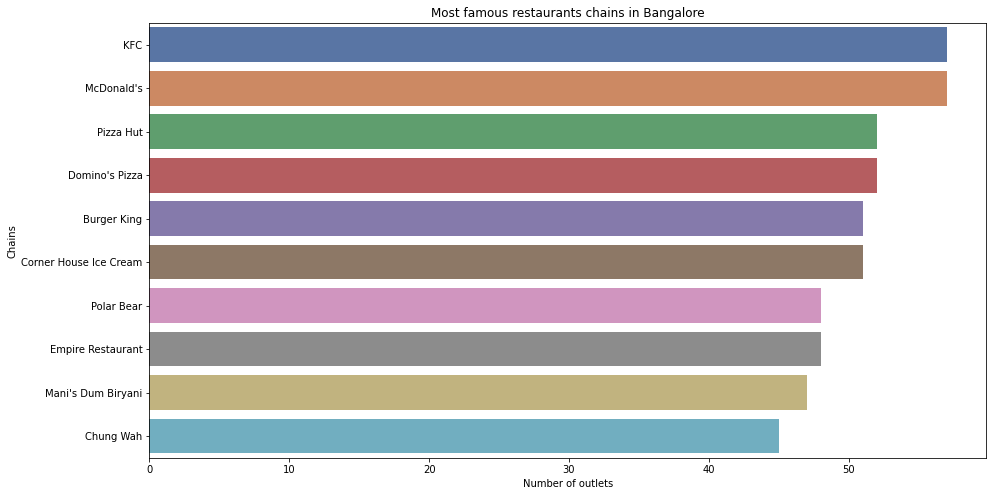

In [25]:
plt.figure(figsize=(15,8))
chains=data['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.ylabel("Chains")

**Insights**
*  McDonald's is most famous chain restaurant chain in Banglore and followed by kfc,Pizza hut, etc..,
* These restuarants has More than 40 branches in Banglore

Text(0.5, 1.0, 'paradise location for the foodies')

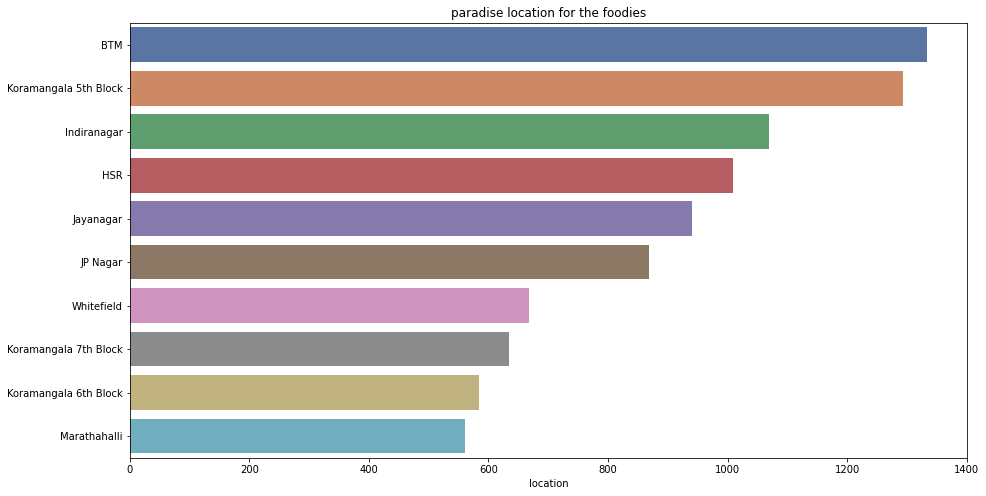

In [26]:
plt.figure(figsize=(15,8))
loc=data['location'].value_counts()[0:10]
sns.barplot(x=loc,y=loc.index,palette='deep')
plt.title("paradise location for the foodies")

**Insights**
* BTM has the highest number of restaurants, followed by Koramangala 7th Block.New BEL Road has the least number of restaurants, followed by Banashankari.
* It seems that the main foodies live in BTM and Koramangala.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Types')

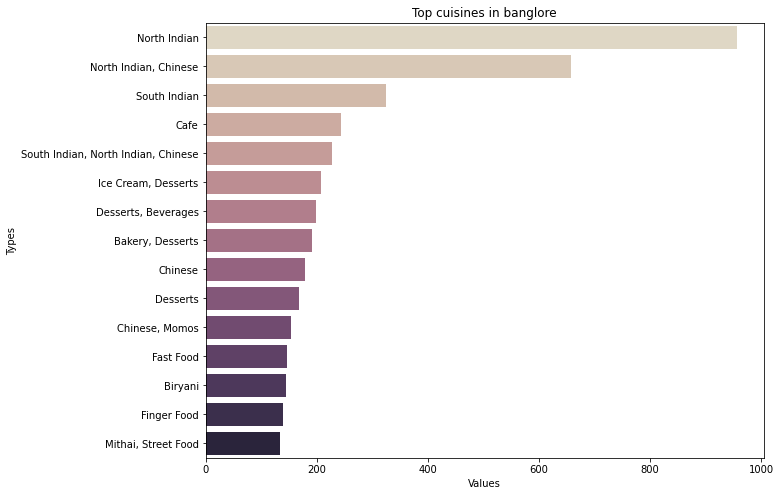

In [27]:
plt.figure(figsize=(10,8))
x=df['cuisines'].value_counts()[0:15]
sns.barplot(x,x.index,palette="ch:s=-.2,r=.6")
plt.title("Top cuisines in banglore")
plt.xlabel("Values")
plt.ylabel('Types')

**Insights**
* We see a South Indian city where people mostly prefer North Indian cuisine,this is because Banglore is a metro city.
* Number of restaurants who serve only North Indian is very high in Bangalore

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Types')

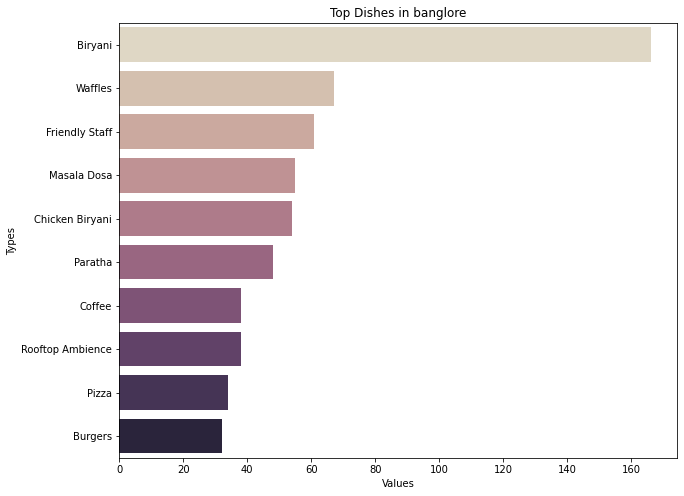

In [28]:
plt.figure(figsize=(10,8))
x=df['dish_liked'].value_counts()[0:10]
sns.barplot(x,x.index,palette="ch:s=-.2,r=.6")
plt.title("Top Dishes in banglore")
plt.xlabel("Values")
plt.ylabel('Types')

**Insights**
* Most of the Bangalore people loved Biryani most and followed by Waffles.
* Masala Dosa is also a highest liked dishes in Banglore.

# **Considering affordablity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Affordability')

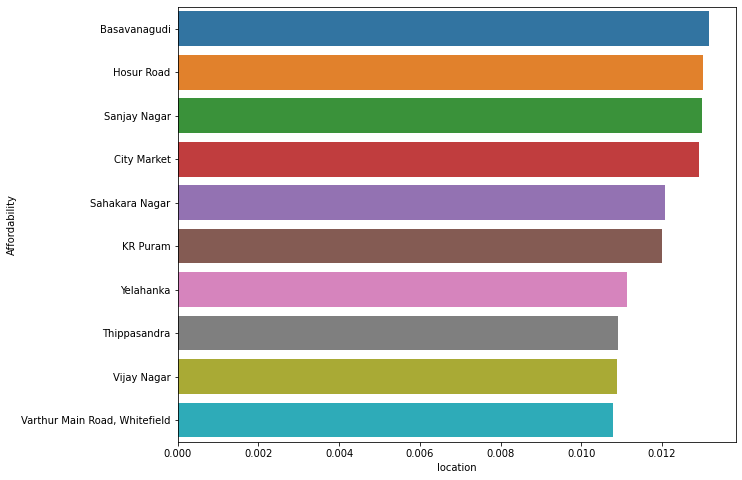

In [29]:
plt.figure(figsize=(10,8))
df['afford']=df['rate']/df['cost']
x=df.groupby('location')['afford'].mean().sort_values(ascending=False)[:10]
sns.barplot(x,x.index)
plt.xlabel('location')
plt.ylabel('Affordability')

**Insights**
* The restaurants which are very affordable are mostly in Basavanagudi and in Hosur road.
* Affordablity is a new column added to this data set by applying a formula with rating and cost for two people.
* Affordability is used to find the restaurants with Good quality. 

#**Rating Distribution** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution for rating for all Resturants in Banglore')

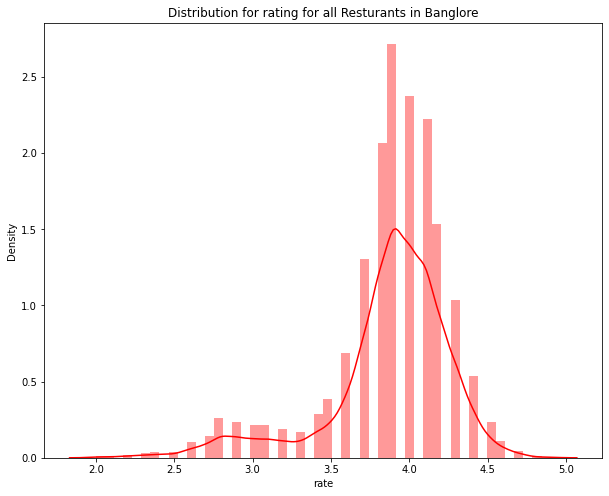

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(df['rate'],color='#FF0000')
plt.title('Distribution for rating for all Resturants in Banglore')

- Major restaurants have rating 3.2 to 4.2
- Very Less restaurants have ratings less than 2.5
- Very few restaurants have ratings greater than 4.5
- We can conclude that most of the restaurants are of average to above average type.

#**Distribution of cost for 2 people**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


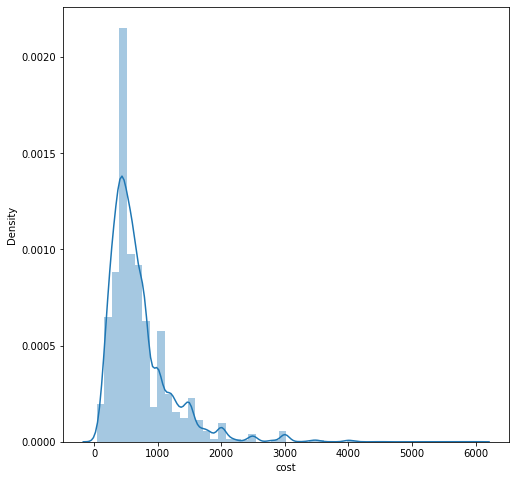

In [31]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])

- Almost 90% restaurants are 1000 for 2
- Number of very expensive restaurants is very less.


In [32]:
df_cost1=df.groupby(['address','name'],as_index=False)['cost'].mean()
df_cost1

,address,name,cost
0,"# 31, 7th Cross, Opposite Canara Bank, Domlur,...",Vinny's,600.0
1,"#10061 Tower 10, Prestige Shanti Niketan., Whi...",Cupcake Couture,300.0
2,"#11 Grace Complex, CMR Road, 5th Main, HRBR La...",Alibaba Cafe and Restaurant,700.0
3,"#115/3 , ITPL Main Road , Near Vodafone Store ...",Biryani Park,500.0
4,"#1178,18th A Main Road, 3rd Cross, 2nd Phase, ...",Bake Addiction,500.0
...,...,...,...
4372,"Yellappa Chetty Layout, Sivanchetti Gardens, U...",Hatti Kaapi,200.0
4373,"Yemalur, Marathahalli, Bangalore",Feel@Home,300.0
4374,"Zone By The Park, 26/A, Electronic City, Banga...",Z-Bar,1500.0
4375,"Zone by The Park, 26/A, Phase 1, Electronic Ci...",Bazaar - Zone By The Park,1400.0


#**Highest top 15 cost for two people, resturant based on address in banglore**

In [33]:
df_cost1_sort=df_cost1.sort_values(by='cost',ascending=False)[:15]
df_cost1_sort

,address,name,cost
4281,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,6000.0
3681,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Royal Afghan - ITC Windsor,5000.0
4043,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties - Radisson Blu,4500.0
3747,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,4100.0
3701,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",Alba - JW Marriott Bengaluru,4000.0
3674,"ITC Gardenia, 1, Residency Road, Bangalore",Edo Restaurant & Bar - ITC Gardenia,4000.0
3678,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Dakshin - ITC Windsor,4000.0
3680,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Dum Pukht Jolly Nabobs - ITC Windsor,4000.0
4280,"The Leela Palace, 23, Old Airport Road, Bangalore",Jamavar - The Leela Palace,4000.0
4309,"The Ritz-Carlton, 99, Residency Road, Bangalore",Riwaz - The Ritz-Carlton,4000.0


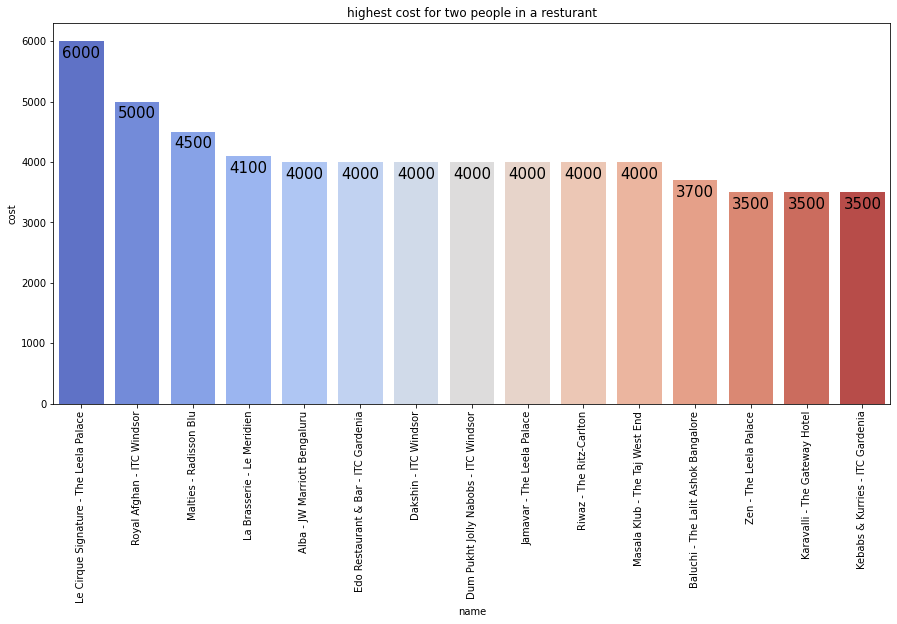

In [55]:
plt.figure(figsize=(15,7))
g= sns.barplot(x="name", y="cost", data=df_cost1_sort,palette="coolwarm")
plt.xticks(rotation=90)
# sns.set_context('talk')
plt.title("highest cost for two people in a resturant")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

**Insights**
* In Bangalore Le Cirque Signature - The Leela Palace	Restaurant cost high for two people (6000) because it is present in Old Airport Road.
* Only few restaurant cost higher in Bangalore from 6000 to 2000 

# **Top 15 resturant with highest rating in banglore**



In [35]:
df_rate=df.groupby(['name'],as_index=False)['votes'].sum()
df_rate_sort=df_rate.sort_values(by='votes',ascending=False).head(15)
df_rate_asc=df_rate.sort_values(by='votes',ascending=True).head(15)

In [36]:
df_rate_sort

,name,votes
1892,Onesta,141278
881,Empire Restaurant,125358
258,Barbeque Nation,77986
655,Chutney Chang,75656
2813,Truffles,59869
2465,Sultans of Spice,51997
2590,The Biere Club,48743
498,Cafe Thulp,46205
392,Bonsouth,44525
1723,Mudpipe Cafe,43267


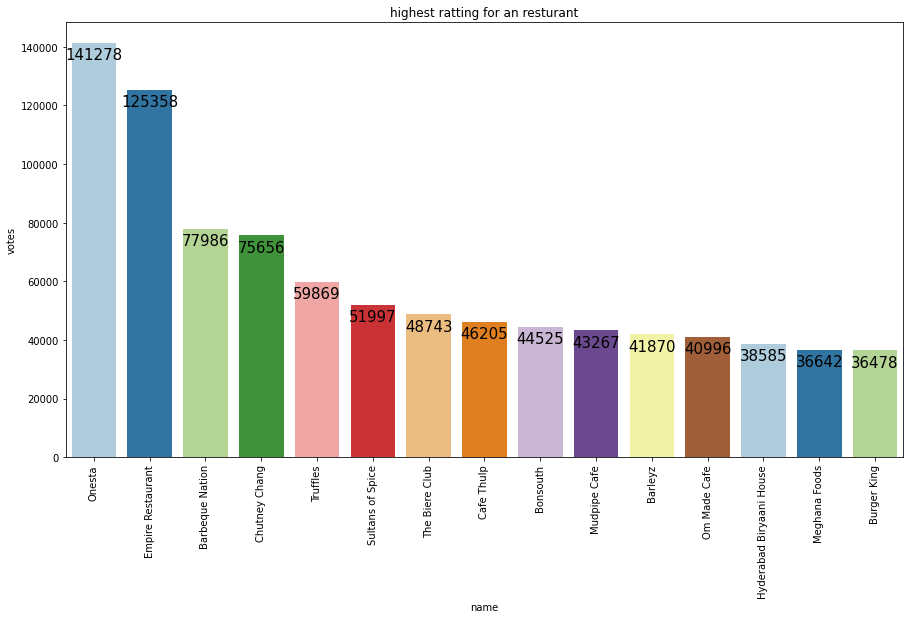

In [37]:
plt.figure(figsize=(15,8))
g= sns.barplot(x="name", y="votes", data=df_rate_sort,palette="Paired")
plt.xticks(rotation=90)
plt.title("highest ratting for an resturant")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

**Insights**
* In Bangalore onesta has the highest rating and followed by empire Restaurant has highest rating.
* Most of top ranked restaurants are above rating count with 140000 to 36000 these are with top 15.

#**Rating and Cost vs online order**

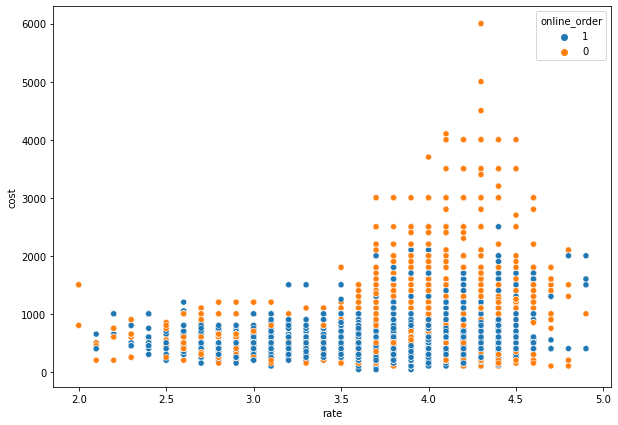

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.show()

**Insights**
* Rating has more scatter with online order in above graph rating affected online order.
* In Bangalore cost dosen't affected the online order because people in banglore anticipation for highest rating and tasty foods.

In [39]:
names = df.groupby('name')['rate'].mean().sort_values(ascending = False).head(15).index
locations = []
for i in names:
    loc = []
    locations.append(df.loc[df['name'] == i]['location'].unique().tolist())
name_location = dict(zip(names, locations))
name_location

{"AB's - Absolute Barbecues": ['BTM', 'Sarjapur Road', 'Kalyan Nagar'],
 'Asia Kitchen By Mainland China': ['Koramangala 5th Block'],
 'Belgian Waffle Factory': ['Koramangala 5th Block', 'Brigade Road'],
 'Biergarten': ['Koramangala 5th Block'],
 'Big Pitcher': ['Old Airport Road'],
 'Byg Brewski Brewing Company': ['Sarjapur Road'],
 'Communiti': ['Residency Road'],
 'ECHOES Koramangala': ['Koramangala 5th Block'],
 'O.G. Variar & Sons': ['Rajajinagar'],
 'Punjab Grill': ['Whitefield'],
 'SantÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â© Spa Cuisine': ['Indiranagar'],
 'Taaza Thindi': ['Banashankari'],
 'The Big Barbeque': ['Electronic City'],
 'The Black Pearl': ['Koramangala 5th Block', 'Marathahalli'],
 'Toit': ['Indiranagar']}

**Insights**
* Above is a list of the top 15 restaurants by rating and the locations where they are present.

# **Finding latitude and longitude of location in Banglore cities** 

In [40]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app")

In [41]:
df['location'] = df['location'].apply(lambda x : x + ', Bengaluru')

In [42]:
locations = []
points = []
for i in df['location'].unique():
#     print(i)
    if geolocator.geocode(i):
        locations.append(i)
        points.append(geolocator.geocode(i).point)
    else:
        continue

In [43]:
location_point = {}
location_point['Locations'] = locations
location_point['Points'] = points

location_point = pd.DataFrame(location_point)

In [44]:
location_point[['lat', 'lon', 'altitude']] = pd.DataFrame(location_point['Points'].to_list())

In [45]:
location_point


,Locations,Points,lat,lon,altitude
0,"Domlur, Bengaluru","12 57m 44.8808s N, 77 38m 17.5049s E",12.962467,77.638196,0.0
1,"Whitefield, Bengaluru","12 58m 10.6914s N, 77 44m 59.0813s E",12.969637,77.749745,0.0
2,"Kalyan Nagar, Bengaluru","13 1m 19.7098s N, 77 38m 25.2125s E",13.022142,77.640337,0.0
3,"Brookefield, Bengaluru","12 58m 0.55668s N, 77 43m 0.80076s E",12.966821,77.716889,0.0
4,"JP Nagar, Bengaluru","12 54m 43.474s N, 77 34m 45.8154s E",12.912076,77.579393,0.0
...,...,...,...,...,...
81,"West Bangalore, Bengaluru","12 54m 59.1019s N, 77 39m 5.82768s E",12.916417,77.651619,0.0
82,"Koramangala, Bengaluru","12 56m 2.44104s N, 77 37m 20.0294s E",12.934011,77.622230,0.0
83,"KR Puram, Bengaluru","13 0m 27.0576s N, 77 41m 45.366s E",13.007516,77.695935,0.0
84,"Central Bangalore, Bengaluru","12 59m 21.295s N, 77 34m 19.0589s E",12.989249,77.571961,0.0


**Insights**
* Latitude and Longitude of the restaurants locations are founded by using geopy.
* Location co-ordinates are founded and created a new dataframe and stored.

In [46]:
import folium

# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location = location_point[["lat", "lon"]].mean().to_list(), zoom_start = 2)

for i in range(0,len(location_point)):
    folium.Marker([location_point.iloc[i]['lat'], location_point.iloc[i]['lon']]).add_to(m)
m

**Insights**
* In the above map clearly shows that the  restaurants in Bangalore are presented in main area of Bangalore cities Beacuse of it is the biggest tech park in India.

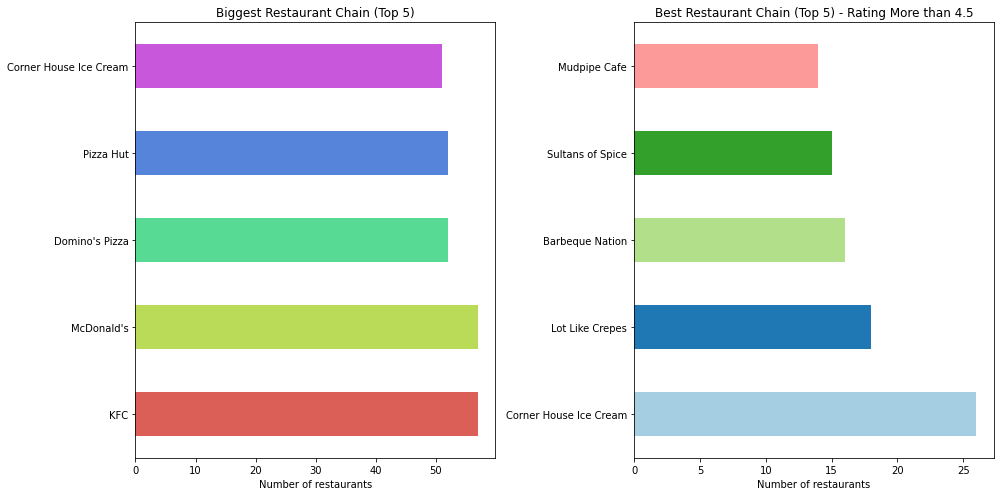

In [47]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
df.name.value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)
df[df['rate']>=4.5]['name'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette("Paired"))
plt.xlabel("Number of restaurants")
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5")
plt.tight_layout()

**Insights**
* McDonald's Has the highest Branches in Bangalore it is an American MNC and followed by KFC also a American MNC in the top list there no Indian chain restaurant in Bangalore.
* Best chain restaurants rating above with 4.5 are Corner House Ice cream with 25 restaurants and followed by Lot Like crepes with 20 restaurants.

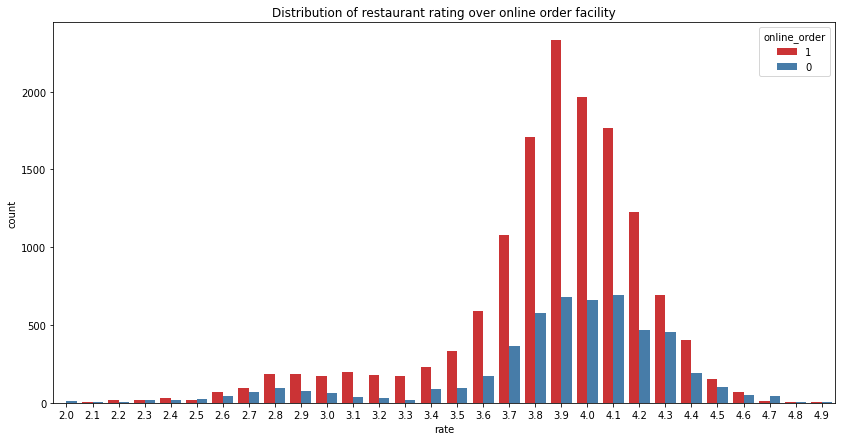

In [48]:
sns.countplot(hue = df["online_order"], palette = "Set1", x = df["rate"])
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

**Insights**
* Restaurants which provide online order facility has better ratings than the traditional restaurants. It makes sense because many software employees stay in Bangalore and they tend to order a lot of food through the online.
* Rating affects the online order of the restaurants in banglore.

**Rate vs Restaurant type graph**

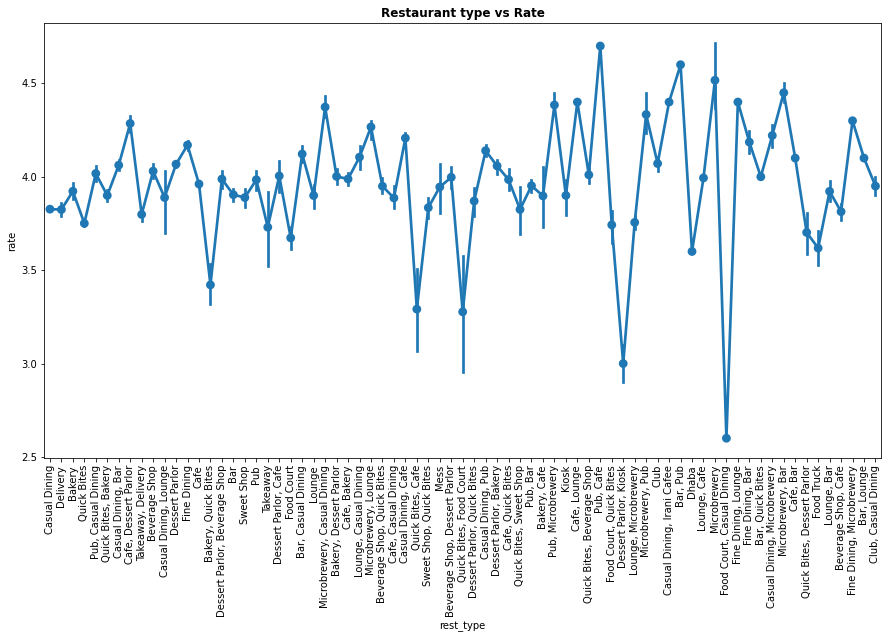

In [57]:
f,ax=plt.subplots(figsize=(15,8))
g=sns.pointplot(y='rate',x='rest_type',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

**Insights**
* In above graph Food Court Restaurants has the least rating given by Bangalore people.
* Quick bites has the Highest rating given by the bangalore people Because they are busy in their works so they prefer Fastest food Delivery . 
* Most of the Restaurants types in bangalore rating are in between 4.2 to 3.5  

In [50]:
kk=df.groupby(['address','name'])
df_7=kk.first()

In [51]:
df_7

,,Unnamed: 0,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,cost,meal_type,city,votes,afford
address,name,,,,,,,,,,,,,
"# 31, 7th Cross, Opposite Canara Bank, Domlur, Bangalore",Vinny's,0,1,0,4.1,"Domlur, Bengaluru",Casual Dining,"Pizza, Pasta, Mocktails, Tiramisu, Garlic Brea...","Burger, Desserts, Italian, Pizza, Salad",600,Delivery,Koramangala 6th Block,366,0.006833
"#10061 Tower 10, Prestige Shanti Niketan., Whitefield, Bangalore",Cupcake Couture,4,0,0,3.8,"Whitefield, Bengaluru",Delivery,"Cup Cake, Chocolate Truffle",Desserts,300,Delivery,Whitefield,40,0.012667
"#11 Grace Complex, CMR Road, 5th Main, HRBR Layout, 2nd Block, Kalyan Nagar, Bangalore",Alibaba Cafe and Restaurant,6,0,0,2.9,"Kalyan Nagar, Bengaluru",Casual Dining,"Biryani, Tea, Falafel, Hookah","Arabian, Middle Eastern",700,Dine-out,Kalyan Nagar,56,0.004143
"#115/3 , ITPL Main Road , Near Vodafone Store & SRIT , Brookefield",Biryani Park,7,1,0,3.4,"Brookefield, Bengaluru",Casual Dining,Hyderabadi Biryani,"North Indian, Biryani, Chinese, Mughlai",500,Delivery,Whitefield,86,0.006800
"#1178,18th A Main Road, 3rd Cross, 2nd Phase, JP Nagar, Bangalore",Bake Addiction,9,1,0,4.0,"JP Nagar, Bengaluru",Bakery,"Cup Cake, Swiss Roll","Bakery, Desserts",500,Delivery,BTM,89,0.008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yellappa Chetty Layout, Sivanchetti Gardens, Ulsoor, Bangalore",Hatti Kaapi,19219,1,0,3.8,"Ulsoor, Bengaluru",Quick Bites,"Filter Coffee, Vada","South Indian, Beverages",200,Delivery,Residency Road,33,0.019000
"Yemalur, Marathahalli, Bangalore",Feel@Home,19223,1,0,3.6,"Marathahalli, Bengaluru","Takeaway, Delivery",Thali,"North Indian, Chinese",300,Delivery,Bellandur,42,0.012000
"Zone By The Park, 26/A, Electronic City, Bangalore",Z-Bar,19226,0,1,4.1,"Electronic City, Bengaluru",Bar,"Cocktails, Tandoori Chicken, Wine, Ice Tea, Fr...","Finger Food, North Indian",1500,Dine-out,Electronic City,410,0.002733


In [52]:
df_dl=df_7['dish_liked'].str.get_dummies(sep=', ')
df_dl

,,Aalo Bhaja,Aam Panna,Aamras,Abbabi Chicken,Achari Chicken,Achari Mushroom,Achari Paneer,Adrak Ke Panje,Afghan Chicken,Afghani Biryani,Afghani Chaap,Afghani Kebab,Afghani Momos,Aglio Olio Pasta,Ajwaini Paratha,Akki Rottis,Al Faham Chicken,Alfam Chicken,Almond Crunch,Almond Flakes,Almond Fudge,Almond Ice Cream,Almond Pie,Almond Shake,Almond Soup,Aloo Biryani,Aloo Curry,Aloo Fry,Aloo Gobhi,Aloo Jeera,Aloo Kulcha,Aloo Litti,Aloo Matar,Aloo Methi,Aloo Palya,Aloo Papdi Chaat,Aloo Paratha,Aloo Patty,Aloo Pitika,Aloo Poori,...,Wai Wai Bhel,Walnut Brownie,Warqi Parantha,Wasabi Ice Cream,Wasabi Prawns,Watermelon Feta Salad,Watermelon Ice Cream,Watermelon Juice,Watermelon Martini,Watermelon Mint Mojito,Watermelon Mojito,Wedges,Wheat Beer,Wheat Momo,Wheat Paratha,Wheat Roll,Wheat Shawarma,White Pasta,White Sauce Pasta,Whole Meat Shawarma,Whole Wheat Pita,Whopper Burger,Whopper Meal,Wild Mushroom Risotto,Wine,Wine Sauteed Mushrooms,Wings,Wonton,Wonton Soup,Wood Fire Pizza,Woodfire Pizza,Yakhni Pulao,Yakhni Shorba,Yaki Tori,Yakisoba,Yellow Thai Curry,Yoghurt Shake,Zafrani Mutton Biryani,Zaraja Paratha,Zinger Burger
address,name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"# 31, 7th Cross, Opposite Canara Bank, Domlur, Bangalore",Vinny's,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#10061 Tower 10, Prestige Shanti Niketan., Whitefield, Bangalore",Cupcake Couture,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#11 Grace Complex, CMR Road, 5th Main, HRBR Layout, 2nd Block, Kalyan Nagar, Bangalore",Alibaba Cafe and Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#115/3 , ITPL Main Road , Near Vodafone Store & SRIT , Brookefield",Biryani Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#1178,18th A Main Road, 3rd Cross, 2nd Phase, JP Nagar, Bangalore",Bake Addiction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yellappa Chetty Layout, Sivanchetti Gardens, Ulsoor, Bangalore",Hatti Kaapi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Yemalur, Marathahalli, Bangalore",Feel@Home,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Zone By The Park, 26/A, Electronic City, Bangalore",Z-Bar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df_c=df_7['cuisines'].str.get_dummies(sep=', ')
df_c

,,Afghan,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,Bakery,Bar Food,Belgian,Bengali,Beverages,Bihari,Biryani,Bohri,British,Bubble Tea,Burger,Burmese,Cafe,Cantonese,Charcoal Chicken,Chettinad,Chinese,Coffee,Continental,Desserts,European,Fast Food,Finger Food,French,German,Goan,Greek,Grill,Gujarati,Healthy Food,Hyderabadi,...,Mangalorean,Mediterranean,Mexican,Middle Eastern,Mithai,Modern Indian,Momos,Mughlai,Naga,Nepalese,North Eastern,North Indian,Oriya,Parsi,Pizza,Portuguese,Rajasthani,Roast Chicken,Rolls,Russian,Salad,Sandwich,Seafood,Sindhi,Singaporean,South American,South Indian,Spanish,Sri Lankan,Steak,Street Food,Sushi,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
address,name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"# 31, 7th Cross, Opposite Canara Bank, Domlur, Bangalore",Vinny's,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#10061 Tower 10, Prestige Shanti Niketan., Whitefield, Bangalore",Cupcake Couture,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#11 Grace Complex, CMR Road, 5th Main, HRBR Layout, 2nd Block, Kalyan Nagar, Bangalore",Alibaba Cafe and Restaurant,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#115/3 , ITPL Main Road , Near Vodafone Store & SRIT , Brookefield",Biryani Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"#1178,18th A Main Road, 3rd Cross, 2nd Phase, JP Nagar, Bangalore",Bake Addiction,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yellappa Chetty Layout, Sivanchetti Gardens, Ulsoor, Bangalore",Hatti Kaapi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
"Yemalur, Marathahalli, Bangalore",Feel@Home,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Zone By The Park, 26/A, Electronic City, Bangalore",Z-Bar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


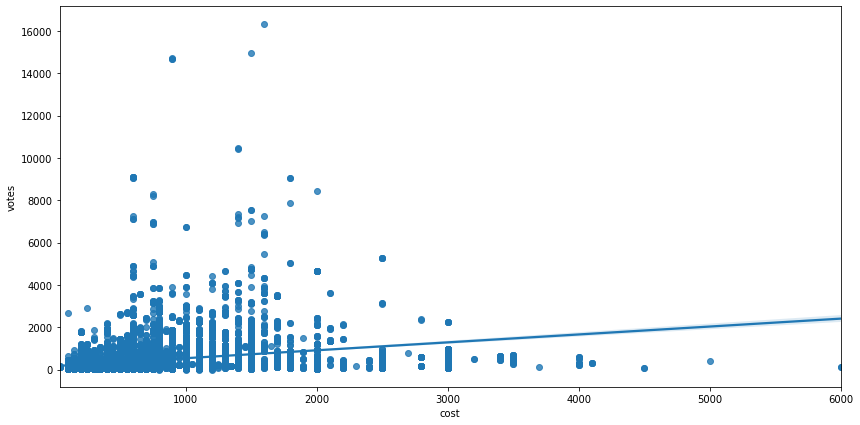

In [54]:
sns.regplot(x="cost", y="votes", data=df)

**Insights**
* Most  Votes for  the restaurants Cost are below 2000 Rupees  

# **Summary of Insights**

* Most of Resturants in Bangalore People takes Online order with 72.9%.
* Restaurants which are not providing online order 27.1%.
* Most of Resturants in Bangalore provides books the table order with 78%.
* Resturants which are not provides Table booking facility with 22%.
* The majority of restaurants offer delivery, which might account for the above conclude that people at Bangalore prefer to eat at home.
* Pubs and Bars,Buffet.cafes are offered by very less number of restaurants.
* Most of people in Bangalore prefers Delivery and Dine out.
* We see that, the most number of restaurants are of the type casual dining.
* From the above plot it is clear that people at Bangalore prefer 'quick bites' more often.
* This supports our above conclusion, which was drawn from the count plot of book table feature that citizens of Bangalore prefer fast food-quick bites more often this is why many restaurants does not offer table booking facility.
* McDonald's is most famous chain restaurant chain in Bangalore and followed by kfc,Pizza hut, etc..,
* These restuarants has More than 40 branches in Bangalore.
* BTM has the highest number of restaurants, followed by Koramangala 7th Block.New BEL Road has the least number of restaurants, followed by Banashankari.
* It seems that the main foodies live in BTM and Koramangala.
* We see a South Indian city where people mostly prefer North Indian cuisine,this is because Banglore is a metro city.
* Number of restaurants who serve only North Indian is very high in Bangalore.
* We see a South Indian city where people mostly prefer North Indian cuisine,this is because Banglore is a metro city.
* Number of restaurants who serve only North Indian is very high in Bangalore.
Most of the Bangalore people loved Biryani most and followed by Waffles.
* Masala Dosa is also a highest liked dishes in Banglore.
* The restaurants which are very affordable are mostly in Basavanagudi and in Hosur road.
* Affordablity is a new column added to this data set by applying a formula with rating and cost for two people.
* Affordability is used to find the restaurants with Good quality. 
* Major restaurants have rating 3.2 to 4.2
* Very Less restaurants have ratings less than 2.5
* Very few restaurants have ratings greater than 4.5
* We can conclude that most of the restaurants are of average to above average type.
* Almost 90% restaurants are 1000 for 2.
* Number of very expensive restaurants is very less.
* In Bangalore Le Cirque Signature - The Leela Palace	Restaurant cost high for two people (6000) because it is present in Old Airport Road.
* Only few restaurant cost higher in Bangalore from 6000 to 2000 .
* In Bangalore onesta has the highest rating and followed by empire Restaurant has highest rating.
* Most of top ranked restaurants are above rating count with 140000 to 36000 these are with top 15.
* Rating has more scatter with online order in above graph rating affected online order.
* In Bangalore cost dosen't affected the online order because people in banglore anticipation for highest rating and tasty foods.
* list of the top 15 restaurants by rating and the locations where they are present.
* Latitude and Longitude of the restaurants locations are founded by using geopy.
* Location co-ordinates are founded and created anew dataframe and stored.
* In the above map clearly shows that the  restaurants in Bangalore are presented in main area of Bangalore cities Beacuse of it is the biggest tech park in India.
* McDonald's Has the highest Branches in Bangalore it is an American MNC and followed by KFC also a American MNC in the top list there no Indian chain restaurant in Bangalore.
* Best chain restaurants rating above with 4.5 are Corner House Ice cream with 25 restaurants and followed by Lot Like crepes with 20 restaurants.
* Restaurants which provide online order facility has better ratings than the traditional restaurants. It makes sense because many software employees stay in Bangalore and they tend to order a lot of food through the online.
* Rating affects the online order of the restaurants in bangalore.
* In above graph Food Court Restaurants has the least rating given by Bangalore people.
* Quick bites has the Highest rating given by the bangalore people Because they are busy in their works so they prefer Fastest food Delivery . 
* Most of the Restaurants types in bangalore rating are in between 4.2 to 3.5  